Project Name:  Digit Recognition using the MNIST Dataset <br>
Submitted By:  Bakhtawar <br>
Submitteed To: Sir Waleed

# importing liabaries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Step 1: Load MNIST Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocessing
# Normalize and reshape the data

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Reshape for CNN and normalize
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Step 3: Define the CNN Model

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')    # Output layer (10 classes)
])

C:\Users\waqas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Define the model

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Step 4: Compile the Model

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
# Early stopping to avoid overfitting

In [9]:
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=3)

# Model checkpoint to save the best model

In [10]:
checkpoint_cb = ModelCheckpoint('digit_recognition_mnist_model.keras', save_best_only=True)

# Train the model with data augmentation


In [11]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32,  validation_data=(x_test, y_test),  callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9084 - loss: 0.3063 - val_accuracy: 0.9865 - val_loss: 0.0402
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9854 - loss: 0.0449 - val_accuracy: 0.9884 - val_loss: 0.0346
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9916 - loss: 0.0285 - val_accuracy: 0.9854 - val_loss: 0.0491
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9927 - loss: 0.0234 - val_accuracy: 0.9905 - val_loss: 0.0304
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9950 - loss: 0.0182 - val_accuracy: 0.9892 - val_loss: 0.0336
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9891 - val_loss: 0.0386
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9910 - val_loss: 0.0345


# Evaluate the model

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0476
Test Accuracy: 0.9909999966621399
Test Loss: 0.034463852643966675


# Step 7: Make Predictions


In [13]:
predictions = model.predict(x_test)
predicted_classes = tf.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Display some test images and their predicted labels


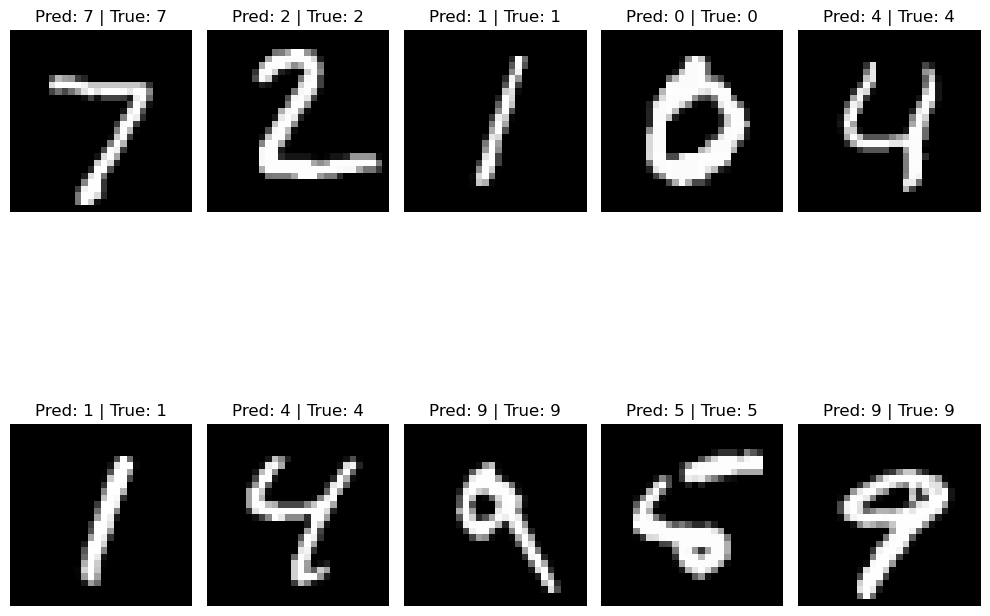

In [14]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]} | True: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Step 8: Save the Final Model


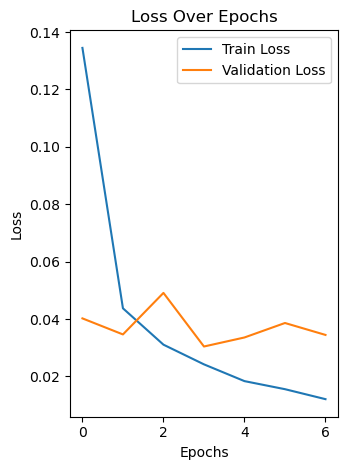

In [15]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the final model

In [16]:
model.save('digit_recognition_mnist_model_final.h5')